In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


/Users/manasdash/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('laptops.csv')

In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


In [6]:
df.shape

(2160, 12)

In [7]:
df.size

25920

In [8]:
df.columns


Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [10]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [11]:
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [12]:
df.drop(['GPU'] , axis=1, inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.duplicated().value_counts()

False    2114
Name: count, dtype: int64

In [15]:
df.nunique()

Laptop          2114
Status             2
Brand             27
Model            119
CPU               27
RAM                9
Storage           11
Storage type       2
Screen            28
Touch              2
Final Price     1409
dtype: int64

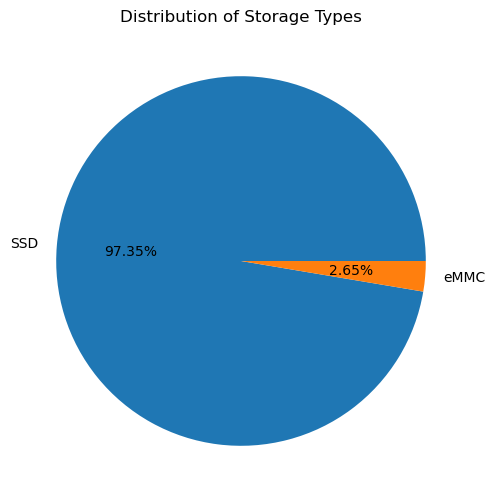

In [16]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Storage Types')
sizes = df['Storage type'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.2f%%')
plt.show()

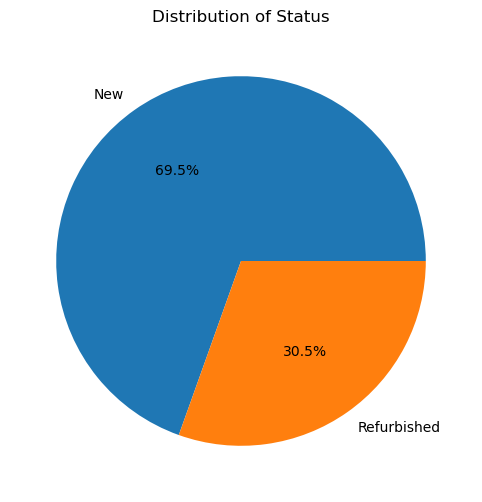

In [17]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Status')
sizes = df['Status'].value_counts()
plt.pie(sizes, labels = sizes.index, autopct = '%1.1f%%')
plt.show()

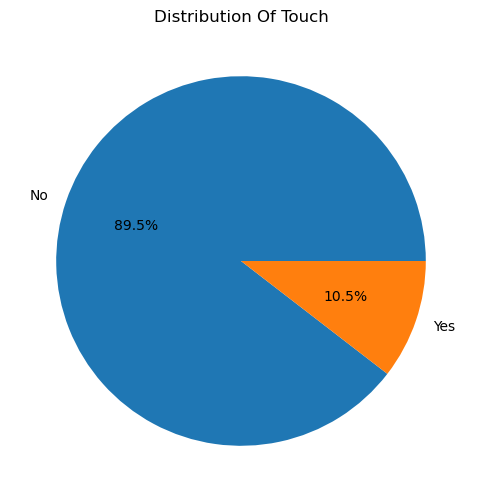

In [18]:
plt.figure(figsize=(8,6))
plt.title('Distribution Of Touch')
sizes = df['Touch'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct = '%1.1f%%')
plt.show()

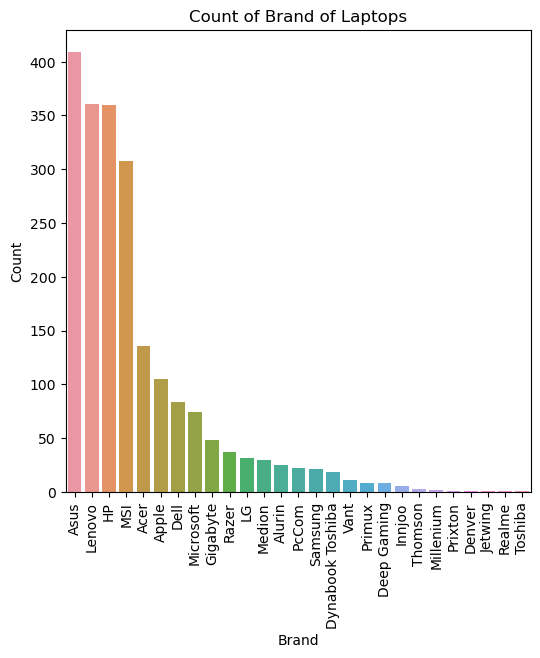

In [19]:
plt.figure(figsize = (6,6))
plt.title('Count of Brand of Laptops')
counts = df['Brand'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

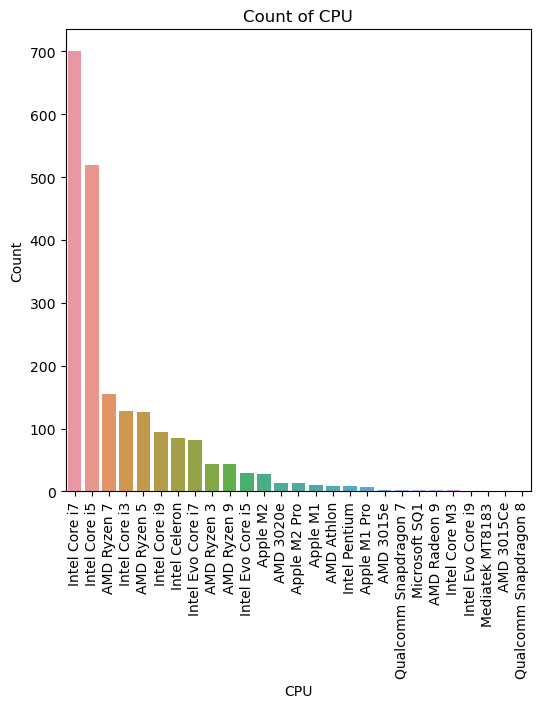

In [20]:
plt.figure(figsize=(6,6))
plt.title('Count of CPU')
counts = df['CPU'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.xlabel('CPU')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

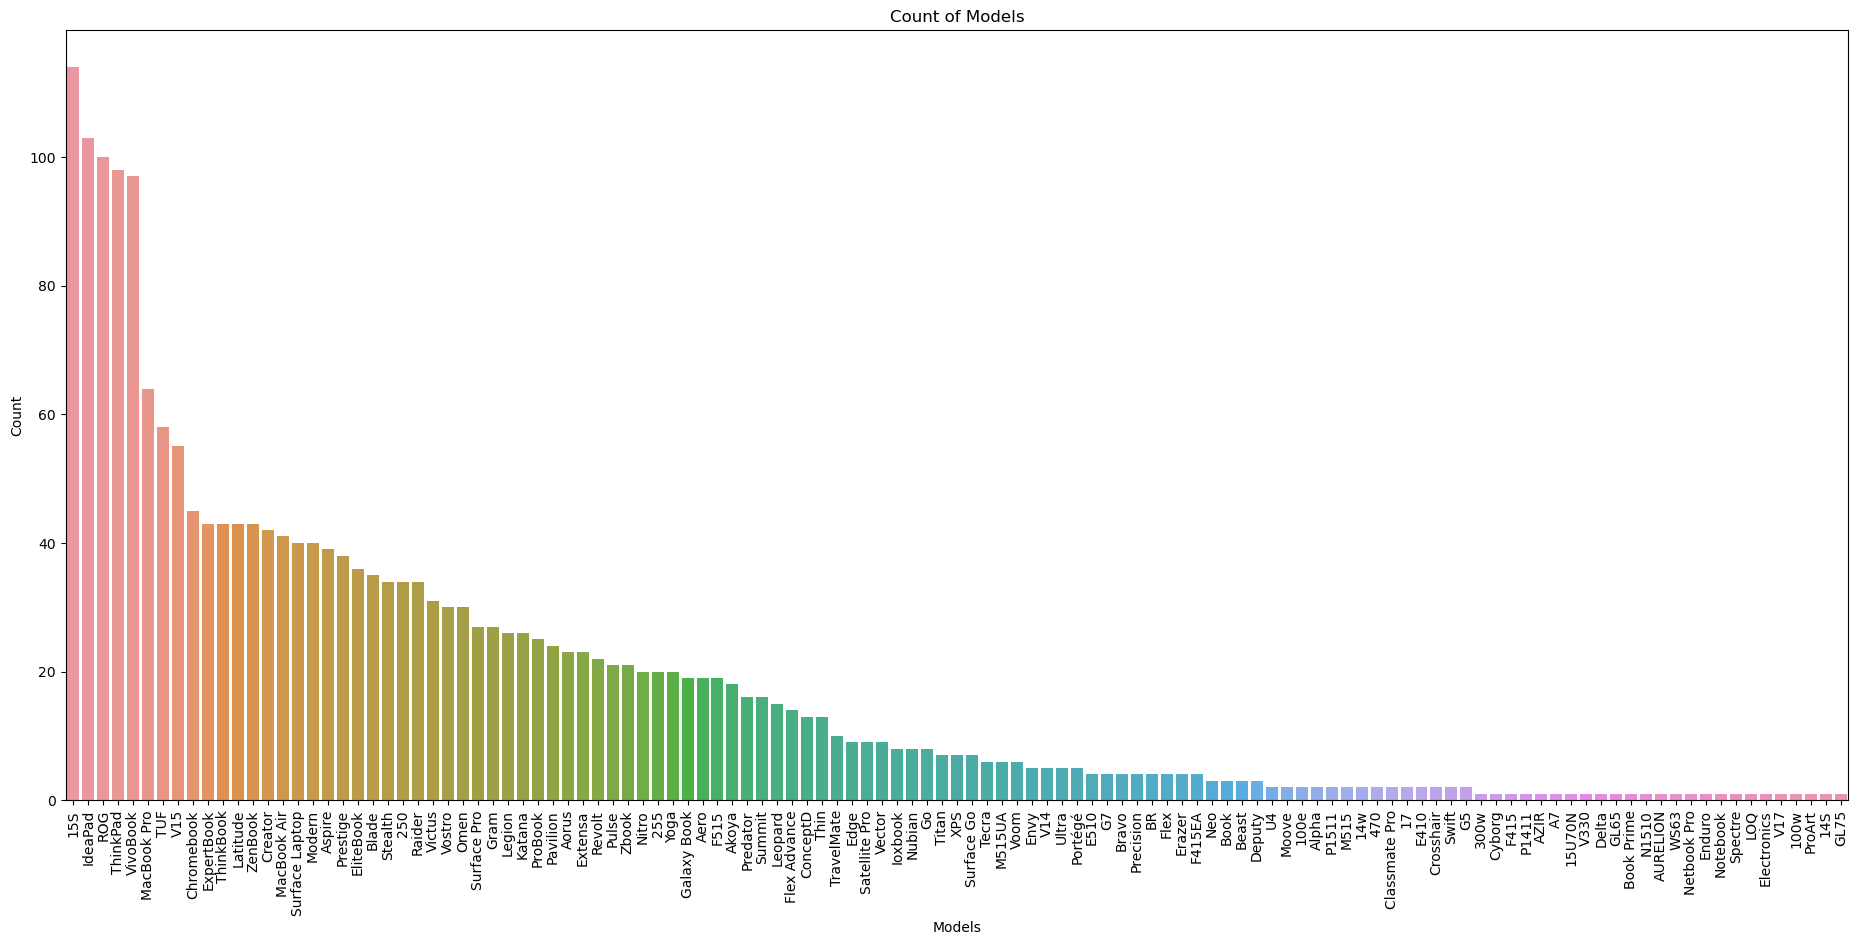

In [21]:
plt.figure(figsize=(23,10))
plt.title('Count of Models')
counts = df['Model'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Models')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

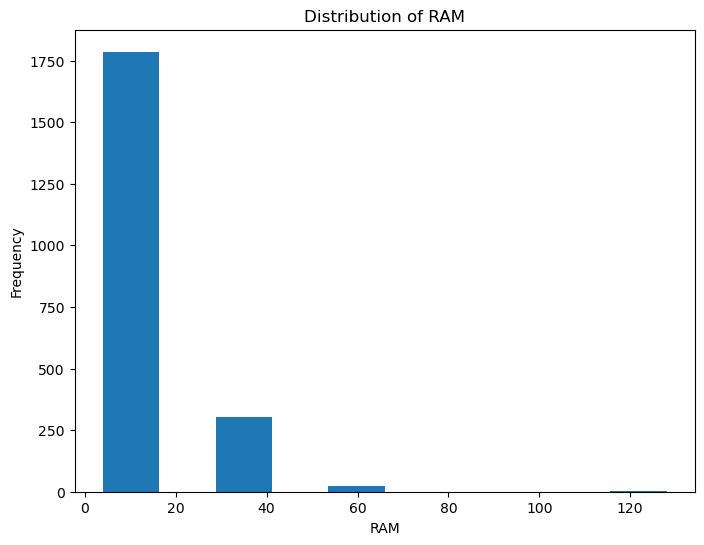

In [22]:
plt.figure(figsize=(8,6))
plt.title('Distribution of RAM')
plt.hist(df['RAM'],bins=10)
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.show()

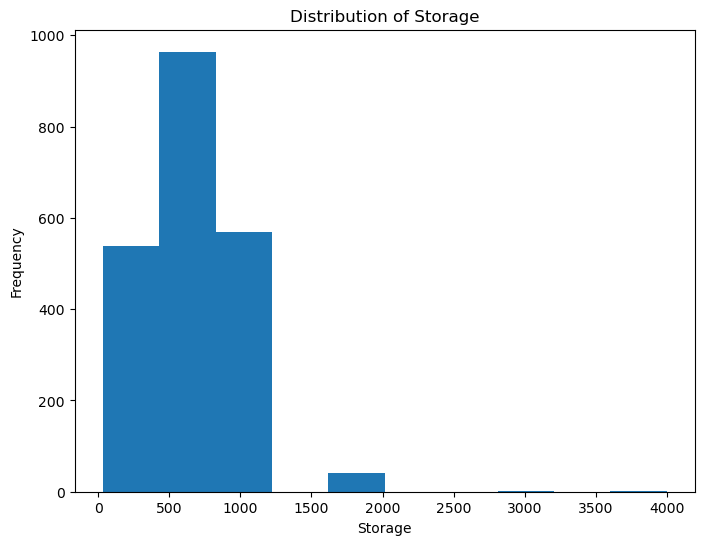

In [23]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Storage')
plt.hist(df['Storage'],bins=10)
plt.xlabel('Storage')
plt.ylabel('Frequency')
plt.show()


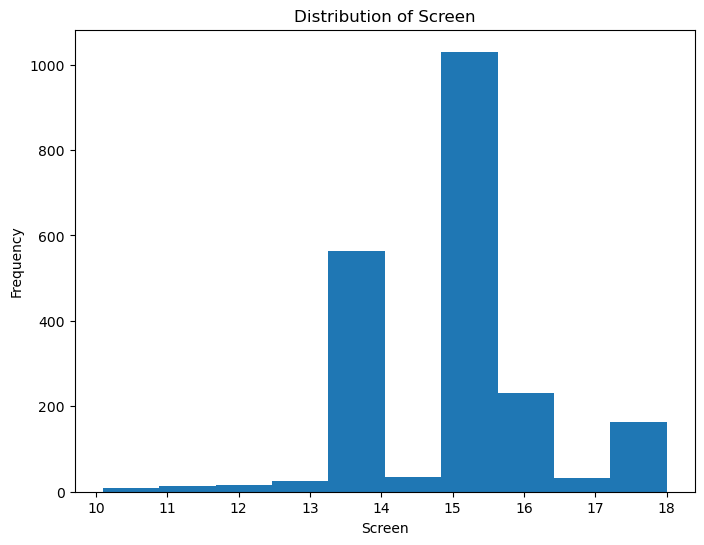

In [24]:
plt.figure(figsize=(8,6))
plt.hist(df['Screen'],bins=10)
plt.xlabel('Screen')
plt.ylabel('Frequency')
plt.title('Distribution of Screen')
plt.show()

### Feature Engineering

In [25]:
#label encoding
label_encoder = LabelEncoder()
df['Status_encoded'] = label_encoder.fit_transform(df['Status'])
df['Storage_encoded'] = label_encoder.fit_transform(df['Storage type'])
df['Touch_encoded'] = label_encoder.fit_transform(df['Touch'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2114 entries, 0 to 2159
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Laptop           2114 non-null   object 
 1   Status           2114 non-null   object 
 2   Brand            2114 non-null   object 
 3   Model            2114 non-null   object 
 4   CPU              2114 non-null   object 
 5   RAM              2114 non-null   int64  
 6   Storage          2114 non-null   int64  
 7   Storage type     2114 non-null   object 
 8   Screen           2114 non-null   float64
 9   Touch            2114 non-null   object 
 10  Final Price      2114 non-null   float64
 11  Status_encoded   2114 non-null   int64  
 12  Storage_encoded  2114 non-null   int64  
 13  Touch_encoded    2114 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 247.7+ KB


In [27]:
df.drop(['Laptop','Status','Brand','Model','CPU','Storage type','Touch'],axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2114 entries, 0 to 2159
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RAM              2114 non-null   int64  
 1   Storage          2114 non-null   int64  
 2   Screen           2114 non-null   float64
 3   Final Price      2114 non-null   float64
 4   Status_encoded   2114 non-null   int64  
 5   Storage_encoded  2114 non-null   int64  
 6   Touch_encoded    2114 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 132.1 KB


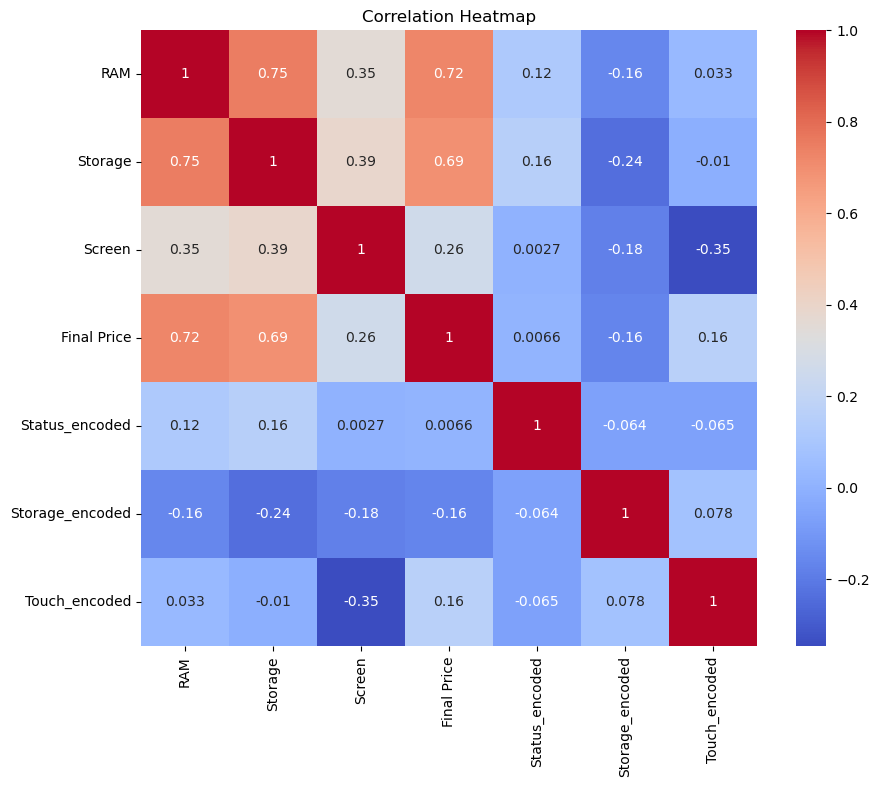

In [29]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',square=True)
plt.title('Correlation Heatmap')
plt.show()

## Data Modeling

In [30]:
X = df[['RAM','Storage','Screen','Status_encoded','Storage_encoded','Touch_encoded']]
y = df['Final Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

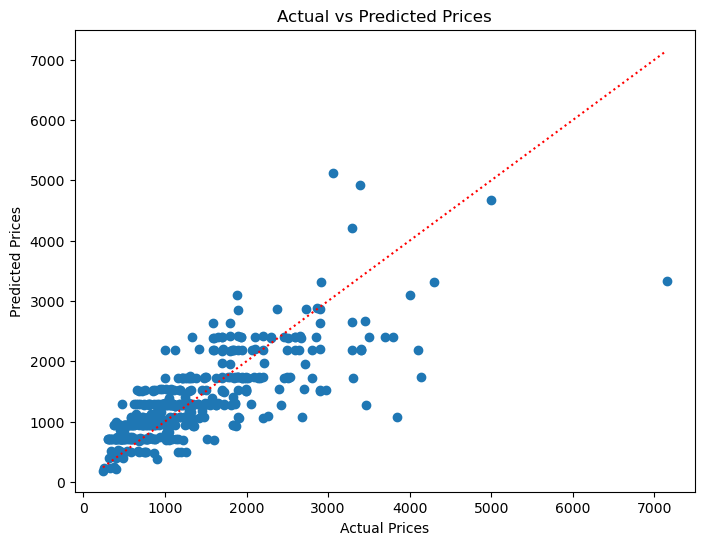

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linestyle='dotted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

### Model Evaluation 

In [32]:
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2 Score):', r2)

Mean Squared Error (MSE): 323695.691237309
Root Mean Squared Error (RMSE): 568.9426080346848
Mean Absolute Error (MAE): 401.32732097295855
R-squared (R2 Score): 0.5832382262482508


In [33]:
coefficients = model.coef_
intercept = model.intercept_ 
print('Coefficients:', coefficients) 
print('Intercept:', intercept)

Coefficients: [  42.22482889    0.90614025    8.57482185 -211.39911504 -127.34749912
  455.95399793]
Intercept: 13.878065598763897


In [34]:
new_laptop = np.array([[8, 256, 15.6, 0, 1, 1]])
predicted_price = model.predict(new_laptop) 
print('Predicted Price:', predicted_price)

Predicted Price: [1046.0223202]


/Users/manasdash/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
